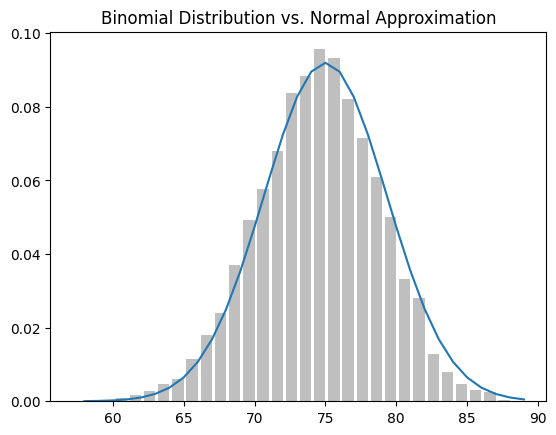

In [1]:
from random import random
from collections import Counter
import matplotlib.pyplot as plt
import math


def bernoulli_trial(p: float) -> int:
    return 1 if random() < p else 0


def binomial(n: int, p: float) -> int:
    return sum(bernoulli_trial(p) for _ in range(n))


def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2


def binomial_histogram(p: float, n: int, num_points: int) -> None:
    data = [binomial(n, p) for _ in range(num_points)]

    histogram = Counter(data)
    plt.bar(
        [x - 0.4 for x in histogram.keys()],
        [v / num_points for v in histogram.values()],
        0.8,
        color="0.75",
    )
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    plt.plot(xs, ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()


binomial_histogram(0.75, 100, 10000)